In [ ]:
#######데이터 불러오기
######텍스트 마이닝 - word2vec
######클러스터 갯수 설정(엘보우)
######군집분석

##개념 한번씩 찾아보세요

In [59]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import openpyxl
from sklearn.datasets import make_blobs

#####데이터 불러오기

file_dir1 ='twenty_store.xlsx'
file_dir2 ='thirty_store.xlsx'
file_dir3 ='forty_store.xlsx'
file_dir4 ='fifty_store.xlsx'

twenty_store = pd.read_excel(file_dir1, sheet_name = 'Sheet1')
thirty_store = pd.read_excel(file_dir2, sheet_name = 'Sheet1')
forty_store = pd.read_excel(file_dir3, sheet_name = 'Sheet1')
fifty_store = pd.read_excel(file_dir4, sheet_name = 'Sheet1')

#인덱스 재설정, '업종' 출력
twenty_store.columns=['num','연도','상권','업종','값']
twenty_store=twenty_store['업종']
print(twenty_store)

thirty_store.columns=['num','연도','상권','업종','값']
thirty_store=thirty_store['업종']
print(twenty_store)

forty_store.columns=['num','연도','상권','업종','값']
forty_store=forty_store['업종']
print(twenty_store)

fifty_store.columns=['num','연도','상권','업종','값']
fifty_store=fifty_store['업종']
print(twenty_store)

0           커피-음료
1             편의점
2            일반의류
3             편의점
4           커피-음료
          ...    
195         커피-음료
196    컴퓨터및주변장치판매
197          일반의류
198          슈퍼마켓
199         한식음식점
Name: 업종, Length: 200, dtype: object
0           커피-음료
1             편의점
2            일반의류
3             편의점
4           커피-음료
          ...    
195         커피-음료
196    컴퓨터및주변장치판매
197          일반의류
198          슈퍼마켓
199         한식음식점
Name: 업종, Length: 200, dtype: object
0           커피-음료
1             편의점
2            일반의류
3             편의점
4           커피-음료
          ...    
195         커피-음료
196    컴퓨터및주변장치판매
197          일반의류
198          슈퍼마켓
199         한식음식점
Name: 업종, Length: 200, dtype: object
0           커피-음료
1             편의점
2            일반의류
3             편의점
4           커피-음료
          ...    
195         커피-음료
196    컴퓨터및주변장치판매
197          일반의류
198          슈퍼마켓
199         한식음식점
Name: 업종, Length: 200, dtype: object


In [11]:
pip install --upgrade gensim

Requirement already up-to-date: gensim in c:\users\ing06\anaconda-new\lib\site-packages (3.8.3)Note: you may need to restart the kernel to use updated packages.



In [84]:
####word2vec
from gensim.models import Word2Vec
import matplotlib.pyplot as plt

A=twenty_store.tolist()
B=thirty_store.tolist()
C=forty_store.tolist() 
D=fifty_store.tolist()
store_list=A+B+C+D

sentence = []
for v in store_list:
    if v not in sentence:
        sentence.append(v)
#print(sentence,'/t')
#print(len(sentence))

categories=[]

for i in sentence:
    temp=[]
    temp.append(i)
    categories.append(temp)

print(categories)
    

[['커피-음료'], ['편의점'], ['일반의류'], ['전자상거래업'], ['제과점'], ['컴퓨터및주변장치판매'], ['PC방'], ['반찬가게'], ['한식음식점'], ['수산물판매'], ['호프-간이주점'], ['슈퍼마켓'], ['일반의원'], ['의료기기'], ['가전제품'], ['화장품'], ['시계및귀금속'], ['양식음식점'], ['신발']]


In [86]:
#모델 구성
model=Word2Vec(categories, min_count=1)
model

In [185]:
model.wv['편의점']

array([ 0.00383627, -0.00064087,  0.00248603,  0.00433743, -0.00299734,
       -0.00398452, -0.00470049,  0.0013436 ,  0.00222565,  0.00152492,
       -0.00307554,  0.001145  , -0.00384856,  0.00099633, -0.00114216,
       -0.00226545, -0.00217357, -0.00326204, -0.00277921, -0.00067735,
       -0.00245051, -0.00097759,  0.00440525, -0.00340386, -0.00398922,
       -0.00352676,  0.00173402, -0.00014595, -0.00186678,  0.00425957,
        0.00062148,  0.00282634,  0.00422716, -0.00474177,  0.00397876,
       -0.00095514, -0.00151805,  0.0046609 , -0.00258616, -0.00231589,
        0.0044517 , -0.00331574, -0.00200889, -0.00268129,  0.0012309 ,
        0.00048912,  0.00106134, -0.00136119, -0.00473962,  0.00331201,
        0.00089558, -0.00306519, -0.0031176 ,  0.00234421, -0.00201   ,
        0.00023463, -0.00343729,  0.0031243 ,  0.00180374, -0.00155661,
       -0.00420459,  0.00029018, -0.00158777, -0.0044484 , -0.00203209,
       -0.00430993, -0.00461157,  0.00173472,  0.00081108, -0.00

In [186]:
model.wv.most_similar('편의점') 

[('일반의원', 0.06959497928619385),
 ('가전제품', 0.030334560200572014),
 ('슈퍼마켓', 0.025162234902381897),
 ('수산물판매', 0.019352834671735764),
 ('반찬가게', 0.01743483543395996),
 ('제과점', 0.013790993019938469),
 ('의료기기', 0.01104278489947319),
 ('전자상거래업', 0.004308640956878662),
 ('신발', -0.003303375095129013),
 ('화장품', -0.030832957476377487)]

In [187]:
model.wv.most_similar('반찬가게') 

[('신발', 0.20635679364204407),
 ('전자상거래업', 0.1376883089542389),
 ('슈퍼마켓', 0.10599784553050995),
 ('커피-음료', 0.10481054335832596),
 ('PC방', 0.08200571686029434),
 ('컴퓨터및주변장치판매', 0.0767786055803299),
 ('일반의류', 0.06805554032325745),
 ('호프-간이주점', 0.054055579006671906),
 ('제과점', 0.04062221944332123),
 ('양식음식점', 0.0379830002784729)]

In [153]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

# TSNE

In [154]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as pltplt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

In [155]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)

# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]
print(X.size)

print(X[0])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:150,:])

<ipython-input-155-bdeed0ab39c1>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]


1900
[ 2.09858315e-03 -4.29072930e-03  2.76095874e-04  2.47667776e-03
  1.63201592e-03  1.86277565e-03 -7.83020048e-04 -1.75905367e-03
 -2.09596870e-03  4.91847284e-03  3.11593711e-03 -4.51266300e-03
 -1.54527428e-03  4.80834581e-03  2.21452047e-03  2.05121282e-03
  3.85559211e-03 -4.26476682e-03  1.27275323e-03 -1.08585926e-04
 -1.98702002e-03 -2.46946845e-04 -2.70875171e-03 -3.68484086e-03
  2.87633901e-03  2.30545877e-03 -3.74377845e-03 -9.13982629e-04
 -1.33736103e-04 -2.92625139e-03  1.96406548e-03  4.90266923e-03
 -2.66505196e-03  4.84205550e-03 -5.90075273e-04 -2.91587901e-03
  2.52887607e-03 -3.56918154e-03  4.09922935e-03  2.72085238e-03
 -1.80684566e-03  4.35739011e-03 -9.61055630e-04 -3.50828399e-03
 -3.32850683e-03 -3.13579710e-03 -1.24515244e-03 -5.93776698e-04
 -2.96245306e-03 -1.40695088e-03 -3.65634914e-03  1.29400787e-03
  4.65255044e-03 -2.50987755e-03 -4.75125853e-03  2.22277595e-03
  2.31071135e-05  2.76972912e-03  2.64795311e-03  1.51559085e-04
  2.85247574e-03  2.

In [156]:
df = pd.DataFrame(X_tsne, index=vocab[:19], columns=['x', 'y'])
df.shape

(19, 2)

In [157]:
df.head(20)

,x,y
커피-음료,-38.534286,48.941006
편의점,152.075089,-93.585762
일반의류,-86.560059,-143.148499
전자상거래업,88.316551,-51.484940
제과점,165.309372,-2.155633
컴퓨터및주변장치판매,-31.581480,130.626221
PC방,31.837311,-91.201332
반찬가게,-36.746674,-82.141304
한식음식점,-57.151409,-16.489950
수산물판매,-3.110590,-164.917252


In [196]:
# 나눔고딕 설치
#!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

matplotlib.rc('font', family='HYsanB')

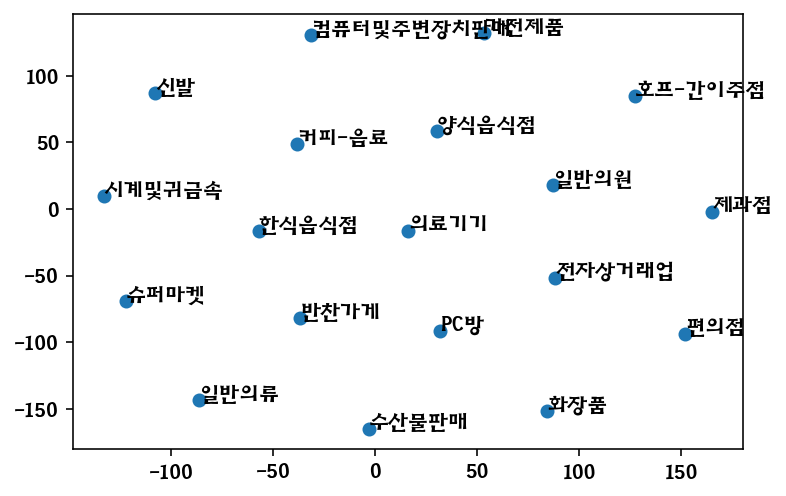

In [200]:
fig = plt.figure()
#fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=10)
plt.show()

# PCA

In [167]:
Word_vectors=model.wv
vocabs=Word_vectors.vocab.keys()
Word_vectors_list=[Word_vectors[v] for v in vocabs]
print(Word_vectors_list)

[array([ 2.09858315e-03, -4.29072930e-03,  2.76095874e-04,  2.47667776e-03,
        1.63201592e-03,  1.86277565e-03, -7.83020048e-04, -1.75905367e-03,
       -2.09596870e-03,  4.91847284e-03,  3.11593711e-03, -4.51266300e-03,
       -1.54527428e-03,  4.80834581e-03,  2.21452047e-03,  2.05121282e-03,
        3.85559211e-03, -4.26476682e-03,  1.27275323e-03, -1.08585926e-04,
       -1.98702002e-03, -2.46946845e-04, -2.70875171e-03, -3.68484086e-03,
        2.87633901e-03,  2.30545877e-03, -3.74377845e-03, -9.13982629e-04,
       -1.33736103e-04, -2.92625139e-03,  1.96406548e-03,  4.90266923e-03,
       -2.66505196e-03,  4.84205550e-03, -5.90075273e-04, -2.91587901e-03,
        2.52887607e-03, -3.56918154e-03,  4.09922935e-03,  2.72085238e-03,
       -1.80684566e-03,  4.35739011e-03, -9.61055630e-04, -3.50828399e-03,
       -3.32850683e-03, -3.13579710e-03, -1.24515244e-03, -5.93776698e-04,
       -2.96245306e-03, -1.40695088e-03, -3.65634914e-03,  1.29400787e-03,
        4.65255044e-03, 

In [203]:
from sklearn.decomposition import PCA
pca = PCA()
xys = pca.fit_transform(Word_vectors_list)
xs = xys[:,0]
ys = xys[:,1]

In [190]:
def plot_2d_graph(vocabs, xs, ys):
    plt.figure(figsize=(8,6))
    plt.scatter(xs, ys, marker='o')
    for i,v in enumerate(vocabs):
        plt.annotate(v, xy=(xs[i],ys[i]))

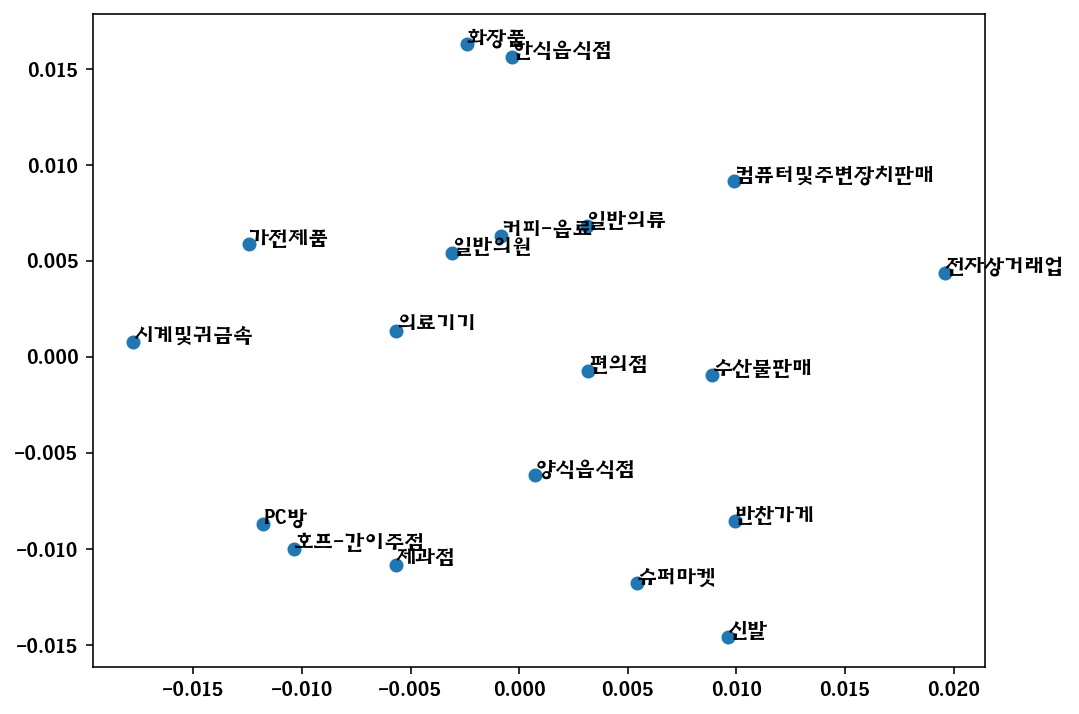

In [195]:
import matplotlib
matplotlib.rc('font', family='HYsanB')
plot_2d_graph(list(model.wv.vocab),xs,ys)

In [181]:
vocab = list(model.wv.vocab)
print(vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]
print(X)

['커피-음료', '편의점', '일반의류', '전자상거래업', '제과점', '컴퓨터및주변장치판매', 'PC방', '반찬가게', '한식음식점', '수산물판매', '호프-간이주점', '슈퍼마켓', '일반의원', '의료기기', '가전제품', '화장품', '시계및귀금속', '양식음식점', '신발']
[[ 0.00209858 -0.00429073  0.0002761  ...  0.00476256 -0.00381998
   0.00181344]
 [ 0.00383627 -0.00064087  0.00248603 ...  0.00282314 -0.00124833
   0.00085798]
 [-0.00359426  0.00154802  0.0033843  ...  0.00467029 -0.00020125
   0.00137143]
 ...
 [-0.00254746 -0.00277492 -0.00486648 ... -0.00378513  0.00406758
  -0.00200632]
 [ 0.00456602  0.00219638 -0.003679   ... -0.00240669 -0.00205497
   0.00495883]
 [ 0.00080266 -0.00125537  0.00467247 ...  0.00246133  0.00304412
  -0.00321161]]


<ipython-input-181-33bccaf9e57c>:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[vocab]
